Loaded dataset and installed necessary libraries

In [14]:
import pandas as pd

dataset = pd.read_csv('Housing.csv')

print(dataset.head())
print(dataset.info())
print(dataset.describe())
print(dataset.shape)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

Checked for missing values 

In [15]:
dataset.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Checked the data types

In [16]:
dataset.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Checked for duplicates

In [17]:
dataset.duplicated().sum()

np.int64(0)

performed label encoding

In [18]:
yes_no_label = [
    'mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea'
]

dataset[yes_no_label] = dataset[yes_no_label].replace({'yes': 1, 'no': 0})

C:\Users\Akanksha Kashyap\AppData\Local\Temp\ipykernel_5380\374586103.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[yes_no_label] = dataset[yes_no_label].replace({'yes': 1, 'no': 0})


In [19]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [20]:
dataset.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object

one hot encoding furnisihing status and dropping dummy value

In [21]:
dataset = pd.get_dummies(
    dataset,
    columns=['furnishingstatus'],
    drop_first=True
)

performed EDA

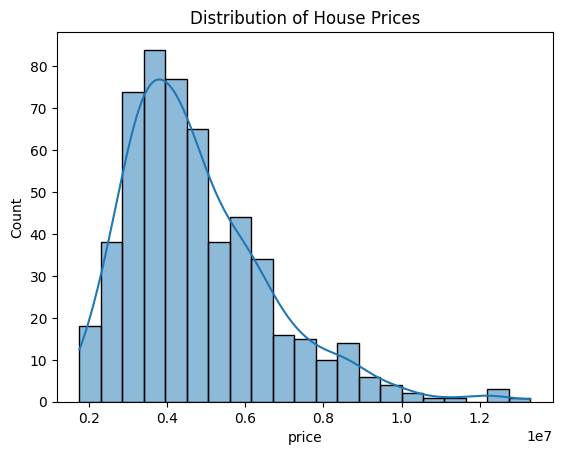

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

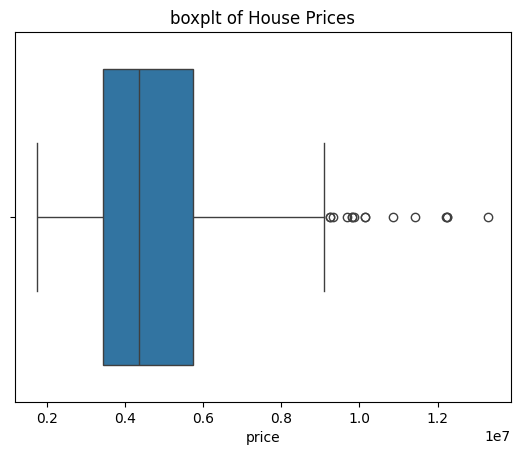

In [26]:
sns.boxplot(x=dataset['price'])
plt.title('boxplt of House Prices')
plt.show()

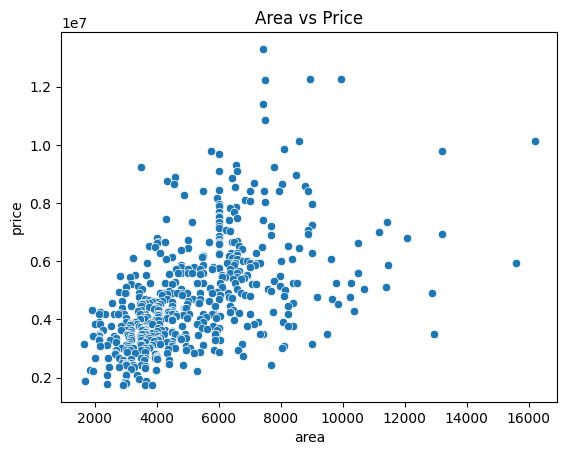

In [27]:
sns.scatterplot(x='area', y='price', data=dataset)
plt.title("Area vs Price")
plt.show()


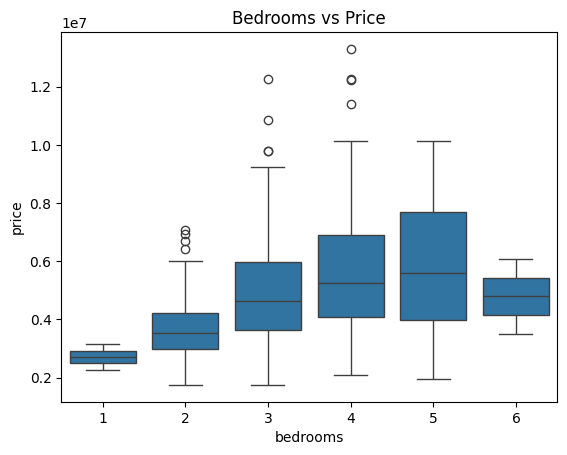

In [28]:
sns.boxplot(x='bedrooms', y='price', data=dataset)
plt.title("Bedrooms vs Price")
plt.show()


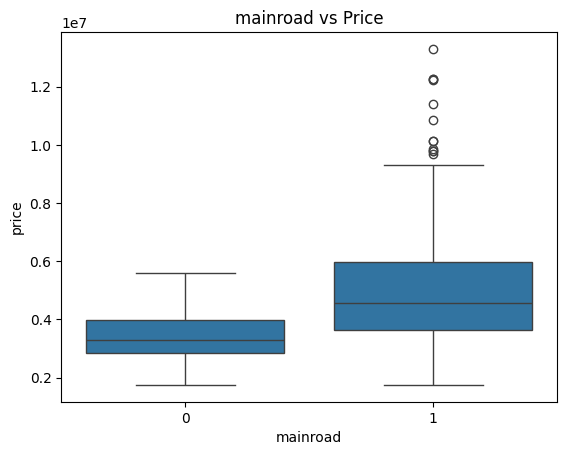

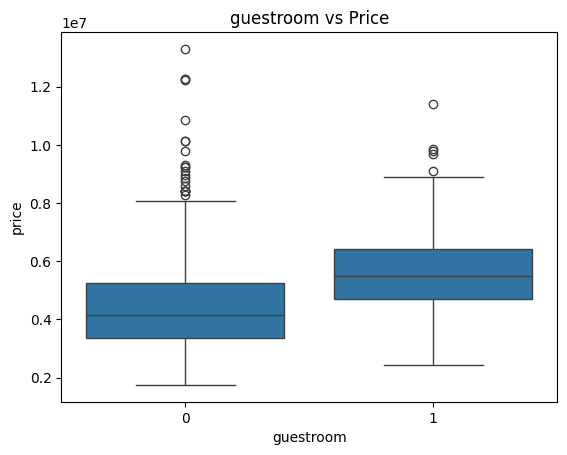

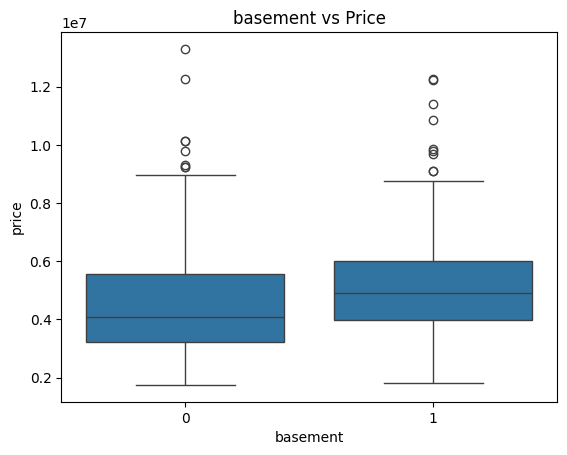

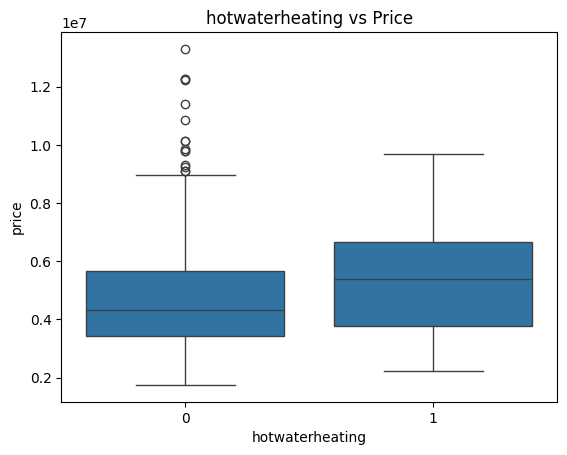

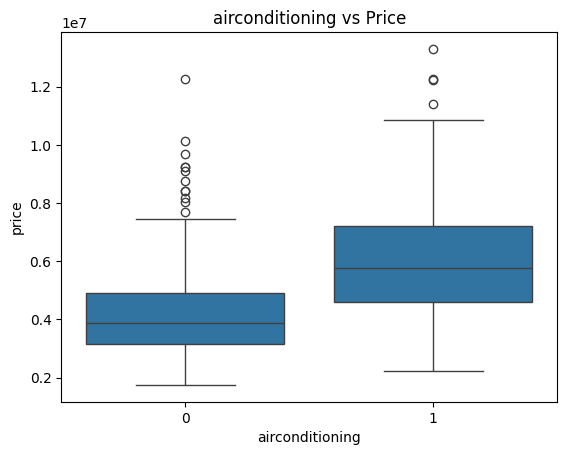

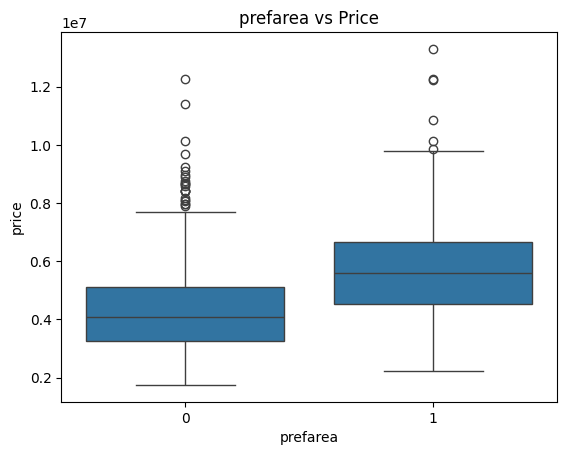

In [29]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

for col in binary_cols:
    sns.boxplot(x=col, y='price', data=dataset)
    plt.title(f"{col} vs Price")
    plt.show()


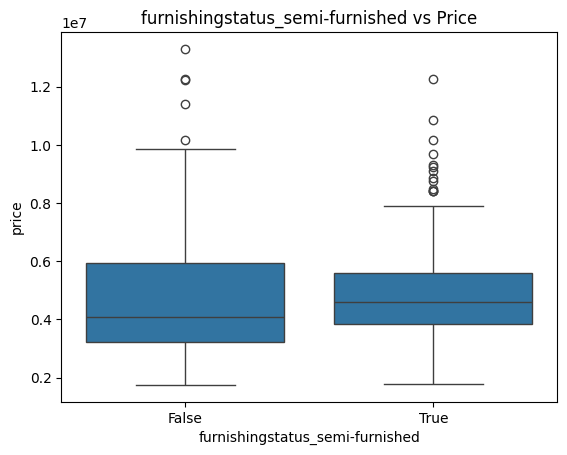

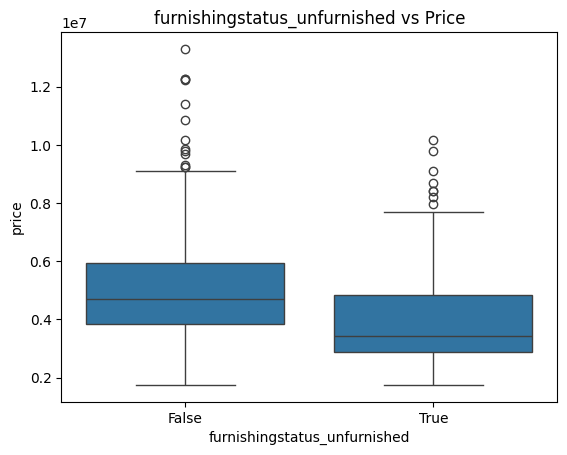

In [30]:
furn_cols = [col for col in dataset.columns if 'furnishingstatus' in col]

for col in furn_cols:
    sns.boxplot(x=col, y='price', data=dataset)
    plt.title(f"{col} vs Price")
    plt.show()


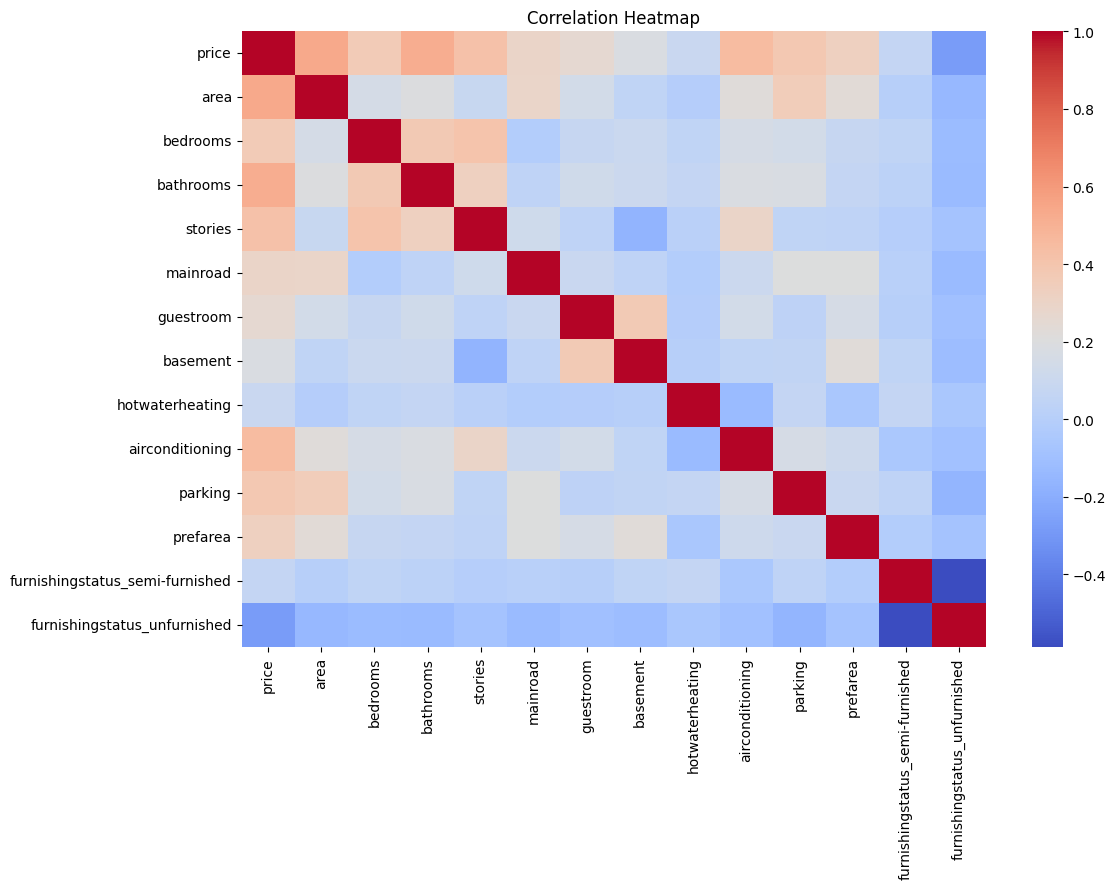

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()
